In [2]:
from keras.datasets import mnist
import numpy as np
np.set_printoptions(precision=2)

import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data();

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
from keras.layers import Input, Dense
from keras.models import Model

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [5]:
x_train_flat = x_train.reshape((len(x_train), 28*28))
x_test_flat = x_test.reshape((len(x_test), 28*28))
print(x_train_flat.shape)
print(x_test_flat.shape)

(60000, 784)
(10000, 784)


In [6]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler().fit(x_train_flat)
x_train_scaled = s.transform(x_train_flat)

In [7]:
ENCODING_DIM = 64
HIDDEN_DIM = 256
# Encoder model
inputs = Input(shape=(784,)) 
encoded = Dense(ENCODING_DIM, activation="relu")(inputs)
encoder_hidden = Dense(HIDDEN_DIM, activation="sigmoid")(encoded)
encoder_model = Model(inputs, encoded, name='encoder')

# Decoder model
encoded_inputs = Input(shape=(ENCODING_DIM,), name='encoding')
decoder_hidden = Dense(HIDDEN_DIM, activation="relu")(encoded_inputs)
reconstruction = Dense(784, activation="sigmoid")(decoder_hidden)
decoder_model = Model(encoded_inputs, reconstruction, name='decoder')

# Defining the full model as the combination of the two
outputs = decoder_model(encoder_model(inputs))
full_model = Model(inputs, outputs, name='full_ae')

In [8]:
full_model = None
full_model = Model(inputs=inputs, 
                   outputs=outputs)

full_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [9]:
full_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
encoder (Functional)         (None, 64)                50240     
_________________________________________________________________
decoder (Functional)         (None, 784)               218128    
Total params: 268,368
Trainable params: 268,368
Non-trainable params: 0
_________________________________________________________________


In [10]:

history = full_model.fit(x_train_scaled, x_train_flat, shuffle=True, epochs=10,)

Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 0.1183 - accuracy: 0.0120
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0870 - accuracy: 0.0125
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0818 - accuracy: 0.0140
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0791 - accuracy: 0.0136
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0775 - accuracy: 0.0148
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0765 - accuracy: 0.0152
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0757 - accuracy: 0.0150
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0751 - accuracy: 0.0149
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0746 - accuracy: 0.0148
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.074

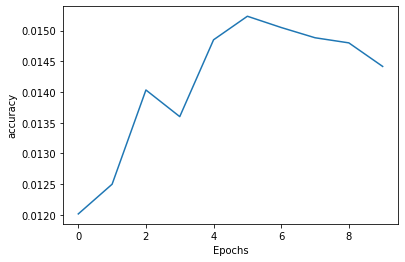

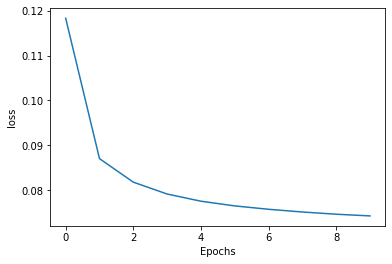

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [12]:
def mse_reconstruction(true, reconstructed):
    return np.sum(np.power(true - reconstructed, 2) / true.shape[1])

In [13]:
# Generate reconstructed images
decoded_images = full_model.predict(x_test_flat)
mse_reconstruction(decoded_images, x_test_flat)

40.82836

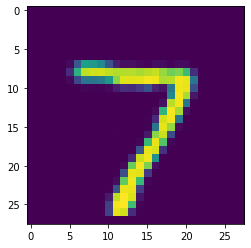

In [14]:
#generated image
plt.imshow(decoded_images[0].reshape(28,28))

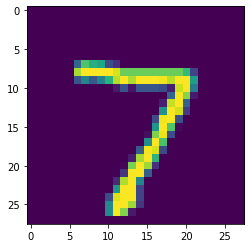

In [16]:
#orignal image
plt.imshow(x_test[0])